#### This Notebook contains all of the visualization developed for Chris Robinson's CSIS638 Final Project. The various visualizations provide and means for exploring Climate and Agricultural Data at the state and county levels.

Import Packages

In [126]:
import mysql.connector as connection
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Climate Line Plots vs Yield Histograms

In [203]:
def cnty_yield_hist(county_name, state, clm_metric):
    """
    county_name: Name of county of interest
    state: abbreviation
    clm_metric: CoolDegDays, MaxTemp, MinTemp, MeanTemp, Precip
    """
    try:
        # Connect to DB
        mydb = connection.connect(host="localhost", database = 'USClimateAgDB',user="mysqlusr", passwd="C0nn0rc@ll13!",use_pure=True)
        # Query the climate data
        clm_query = f"Select * from {clm_metric} WHERE (County = '{county_name} County' AND State = '{state}');"
        # Query the agricultural tables
        ag_query1 = f"Select Yield_sum, Year from Corn WHERE (County = '{county_name} County' AND State = '{state}');"
        ag_query2 = f"Select Yield_sum, Year from Barley WHERE (County = '{county_name} County' AND State = '{state}');"
        ag_query3 = f"Select Yield_sum, Year from Oats WHERE (County = '{county_name} County' AND State = '{state}');"
        ag_query4 = f"Select Yield_sum, Year from Soybeans WHERE (County = '{county_name} County' AND State = '{state}');"
        # Read results into Pandas dataframes and rename columns to Crop Type
        clm_result = pd.read_sql(clm_query,mydb)
        ag_result1 = pd.read_sql(ag_query1,mydb)
        ag_result1 = ag_result1.rename(columns={"Yield_sum": "Corn"})
        ag_result2 = pd.read_sql(ag_query2,mydb)
        ag_result2 = ag_result2.rename(columns={"Yield_sum": "Barley"})
        ag_result3 = pd.read_sql(ag_query3,mydb)
        ag_result3 = ag_result3.rename(columns={"Yield_sum": "Oats"})
        ag_result4 = pd.read_sql(ag_query4,mydb)
        ag_result4 = ag_result4.rename(columns={"Yield_sum": "Soybeans"})
        # Close connection
        mydb.close() #close the connection
    except Exception as e:
        mydb.close()
        print(str(e))
    # Join the dataframes from the ag queries on year
    ag_result = ag_result1.set_index('Year').join(ag_result2.set_index('Year')).join(ag_result3.set_index('Year')).join(ag_result4.set_index('Year'))
    ag_result = ag_result.sort_index()
    columns = ["January","February","March","April","May","June","July","August","September","October","November","December"]
    clm_result['Min']=clm_result[columns].min(axis=1)
    clm_result['Max']=clm_result[columns].max(axis=1)
    clm_result['Total']=clm_result[columns].sum(axis=1)
    clm_result['Avg']=clm_result[columns].mean(axis=1)
    # Rules for aggregation to display based on climate varible
    if clm_metric == "MaxTemp":
        ax = clm_result['Max'].plot(color='black', secondary_y=True, figsize=(15.0, 10.0))
    if clm_metric == "MinTemp":
        ax = clm_result['Min'].plot(color='black', secondary_y=True, figsize=(15.0, 10.0))
    if clm_metric == "CoolDegDays":
        ax = clm_result['Avg'].plot(color='black', secondary_y=True, figsize=(15.0, 10.0))
    if clm_metric == "MeanTemp":
        ax = clm_result['Avg'].plot(color='black', secondary_y=True, figsize=(15.0, 10.0))
    if clm_metric == "Precip":
        ax = clm_result['Avg'].plot(color='black', secondary_y=True, figsize=(15.0, 10.0))
    
    # Generate a new Axes instance, on the twin-X axes (same position)
    
    ag_result[['Corn', 'Oats', 'Soybeans', 'Barley']].plot(kind='bar', ax=ax)
    ax.set_ylabel(f'Annual {clm_metric}')
    ax.set_title(f'{county_name} County, {state}: {clm_metric} Vs. Yield (bushels/acre)')



    plt.show()


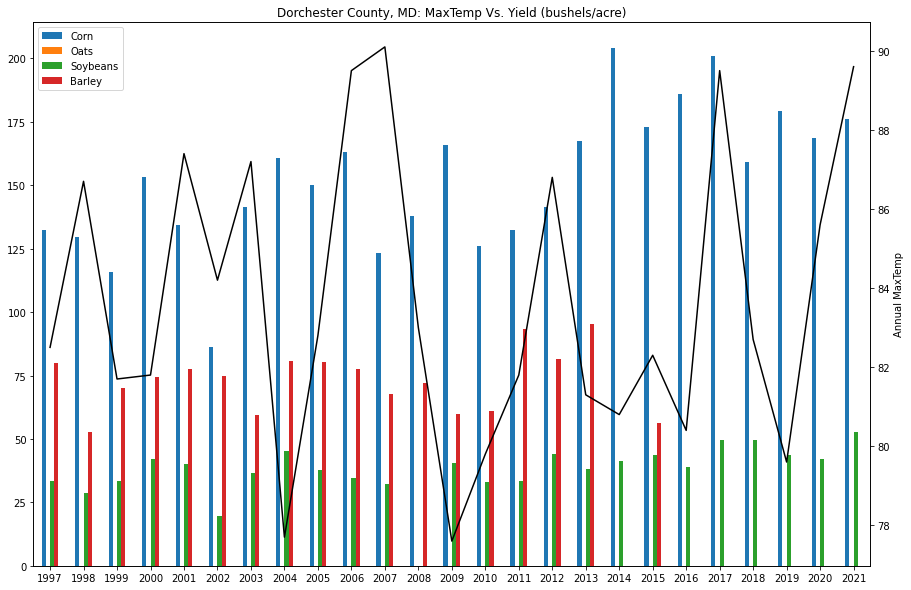

In [215]:
cnty_yield_hist("Dorchester", "MD", "MaxTemp")

In [207]:
def state_yield_hist(state, clm_metric):
    """
    county_name: Name of county of interest
    state: abbreviation
    clm_metric: CoolDegDays, MaxTemp, MinTemp, MeanTemp, Precip
    crop: Barley, Corn, Oats, Soybeans
    """
    try:
        mydb = connection.connect(host="localhost", database = 'USClimateAgDB',user="mysqlusr", passwd="C0nn0rc@ll13!",use_pure=True)
        clm_query = f"Select * from {clm_metric} WHERE State = '{state}';"
        ag_query1 = f"Select AVG(Yield_sum), Year from Corn WHERE State = '{state}' GROUP BY Year ;"
        ag_query2 = f"Select AVG(Yield_sum), Year from Barley WHERE State = '{state}' GROUP BY Year ;"
        ag_query3 = f"Select AVG(Yield_sum), Year from Oats WHERE State = '{state}' GROUP BY Year ;"
        ag_query4 = f"Select AVG(Yield_sum), Year from Soybeans WHERE State = '{state}' GROUP BY Year ;"
        clm_result = pd.read_sql(clm_query,mydb)
        ag_result1 = pd.read_sql(ag_query1,mydb)
        ag_result1 = ag_result1.rename(columns={"AVG(Yield_sum)": "Corn"})
        ag_result2 = pd.read_sql(ag_query2,mydb)
        ag_result2 = ag_result2.rename(columns={"AVG(Yield_sum)": "Barley"})
        ag_result3 = pd.read_sql(ag_query3,mydb)
        ag_result3 = ag_result3.rename(columns={"AVG(Yield_sum)": "Oats"})
        ag_result4 = pd.read_sql(ag_query4,mydb)
        ag_result4 = ag_result4.rename(columns={"AVG(Yield_sum)": "Soybeans"})
        mydb.close() #close the connection
    except Exception as e:
        mydb.close()
        print(str(e))
    
    ag_result = ag_result1.set_index('Year').join(ag_result2.set_index('Year')).join(ag_result3.set_index('Year')).join(ag_result4.set_index('Year'))
    ag_result = ag_result.sort_index()
    columns = ["January","February","March","April","May","June","July","August","September","October","November","December"]
    clm_result['Avg'] =clm_result[columns].mean(axis=1)
    clm_result_yr = clm_result.groupby('Year')['Avg'].mean()
    clm_result_yr_df = clm_result_yr.to_frame().reset_index()

    ax = clm_result_yr_df['Avg'].plot(color='black', secondary_y=True, figsize=(15.0, 10))
    
    # Generate a new Axes instance, on the twin-X axes (same position)
   
    ag_result[['Corn', 'Oats', 'Soybeans', 'Barley']].plot(kind='bar', ax=ax)

    ax.set_xlabel('Year')
    ax.set_ylabel(f'Monthly Average {clm_metric}')
    ax.set_title(f'{state}: {clm_metric} Vs. Avg Yield (bushels/acre)')
    plt.show()


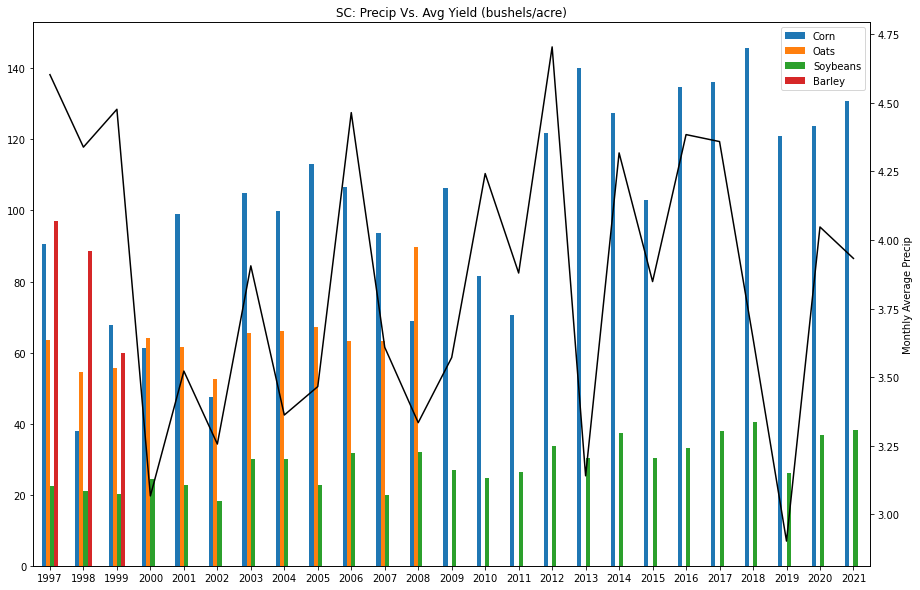

In [208]:
state_yield_hist("SC", "Precip")

In [209]:
def cnty_line_plot(county_name, state, clm_metric, crop):
    """
    county_name: Name of county of interest
    state: abbreviation
    clm_metric: CoolDegDays, MaxTemp, MinTemp, MeanTemp, Precip
    crop: Barley, Corn, Oats, Soybeans
    """
    try:
        mydb = connection.connect(host="localhost", database = 'USClimateAgDB',user="mysqlusr", passwd="C0nn0rc@ll13!",use_pure=True)
        clm_query = f"Select * from {clm_metric} WHERE (County = '{county_name} County' AND State = '{state}');"
        ag_query = f"Select * from {crop} WHERE (County = '{county_name} County' AND State = '{state}');"
        clm_result = pd.read_sql(clm_query,mydb)
        ag_result = pd.read_sql(ag_query,mydb)
        mydb.close() #close the connection
    except Exception as e:
        mydb.close()
        print(str(e))
    df_merged = pd.merge(clm_result, ag_result, on=['State', 'County', 'Year'], how='inner')
    df_merged = df_merged.drop(columns=['Id_x', 'Id_y'])
    columns = ["January","February","March","April","May","June","July","August","September","October","November","December"]
    df_merged['Min']=df_merged[columns].min(axis=1)
    df_merged['Max']=df_merged[columns].max(axis=1)
    df_merged['Total']=df_merged[columns].sum(axis=1)
    df_merged['Avg']=df_merged[columns].mean(axis=1)
    # Sequences
    crop_type = df_merged['Yield_sum'].to_list()
    if clm_metric == "MaxTemp":
        metric = df_merged['Max'].to_list()
    if clm_metric == "MinTemp":
        metric = df_merged['Min'].to_list()
    if clm_metric == "CoolDegDays":
        metric = df_merged['Avg'].to_list()
    if clm_metric == "MeanTemp":
        metric = df_merged['Avg'].to_list()
    if clm_metric == "Precip":
        metric = df_merged['Avg'].to_list()
    # X Axis
    date = df_merged['Year'].to_list()
    fig, ax = plt.subplots(figsize=(10.0, 7.0))
    # Plot linear sequence, and set tick labels to the same color
    ax.plot(date, crop_type, color='red')
    ax.tick_params(axis='y', labelcolor='red')
    ax.set_ylabel(f'{crop} (bushels/acre)')
    # Generate a new Axes instance, on the twin-X axes (same position)
    ax2 = ax.twinx()
    ax2.plot(date, metric, color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.set_ylabel(f'{clm_metric}')
    ax.set_title(f'{county_name} County, {state}')
    plt.show()

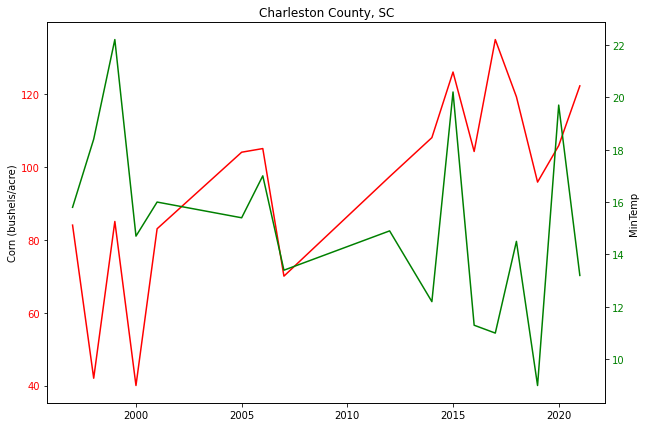

In [216]:
cnty_line_plot("Charleston", "SC","MinTemp","Corn" )

In [211]:
def st_line_plot(state, clm_metric, crop):
    """
    county_name: Name of county of interest
    state: abbreviation
    clm_metric: CoolDegDays, MaxTemp, MinTemp, MeanTemp, Precip
    crop: Barley, Corn, Oats, Soybeans
    """
    try:
        mydb = connection.connect(host="localhost", database = 'USClimateAgDB',user="mysqlusr", passwd="C0nn0rc@ll13!",use_pure=True)
        clm_query = f"Select * from {clm_metric} WHERE State = '{state}';"
        ag_query = f"Select AVG(Yield_sum), Year from {crop} WHERE State = '{state}' GROUP BY Year ;"
        clm_result = pd.read_sql(clm_query,mydb)
        ag_result = pd.read_sql(ag_query,mydb)
        mydb.close() #close the connection
    except Exception as e:
        mydb.close()
        print(str(e))
    columns = ["January","February","March","April","May","June","July","August","September","October","November","December"]
    clm_result['Avg'] =clm_result[columns].mean(axis=1)
    clm_result_yr = clm_result.groupby('Year')['Avg'].mean()
    df_merged = pd.merge(clm_result_yr, ag_result, on=['Year'], how='inner')
    # Sequences
    crop_type = df_merged['AVG(Yield_sum)'].to_list()
    metric = df_merged['Avg'].to_list()
    # X Axis
    date = df_merged['Year'].to_list()
    fig, ax = plt.subplots(figsize=(10.0, 7.0))
    # Plot linear sequence, and set tick labels to the same color
    ax.plot(date, crop_type, color='red')
    ax.tick_params(axis='y', labelcolor='red')
    ax.set_ylabel(f'{crop} (Bushel/acre)')
    # Generate a new Axes instance, on the twin-X axes (same position)
    ax2 = ax.twinx()
    ax2.plot(date, metric, color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.set_ylabel(f'Average {clm_metric}')
    ax.set_title(f'{state} Average Yield vs {clm_metric}')
    plt.show()

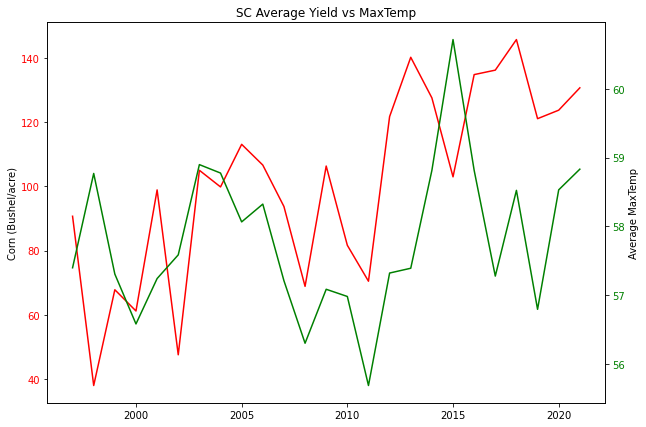

In [212]:
st_line_plot("SC", "MaxTemp", "Corn")

Correlation Matrix

In [213]:
def corr_matrix(clm_metric, crop, state):
    """
    clm_metric: CoolDegDays, MaxTemp, MinTemp, MeanTemp, Precip
    crop: Barley, Corn, Oats, Soybeans
    state: abbreviation
    """
    try:
        mydb = connection.connect(host="localhost", database = 'USClimateAgDB',user="mysqlusr", passwd="C0nn0rc@ll13!",use_pure=True)
        clm_query = f"Select * from {clm_metric} WHERE State = '{state}';"
        ag_query = f"Select * from {crop} WHERE State = '{state}';"
        clm_result = pd.read_sql(clm_query,mydb)
        ag_result = pd.read_sql(ag_query,mydb)
        mydb.close() #close the connection
    except Exception as e:
        mydb.close()
        print(str(e))
    # Join Dataframes
    df_merged = pd.merge(clm_result, ag_result, on=['State', 'County', 'Year'], how='inner')
    df_merged = df_merged.drop(columns=['Id_x', 'Id_y', 'State', 'County', 'Year'])
    corrM = df_merged.corr()
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    ax = sns.heatmap(corrM, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(title=f"Correlation Matrix Between {clm_metric} and {crop} Yield for {state}")


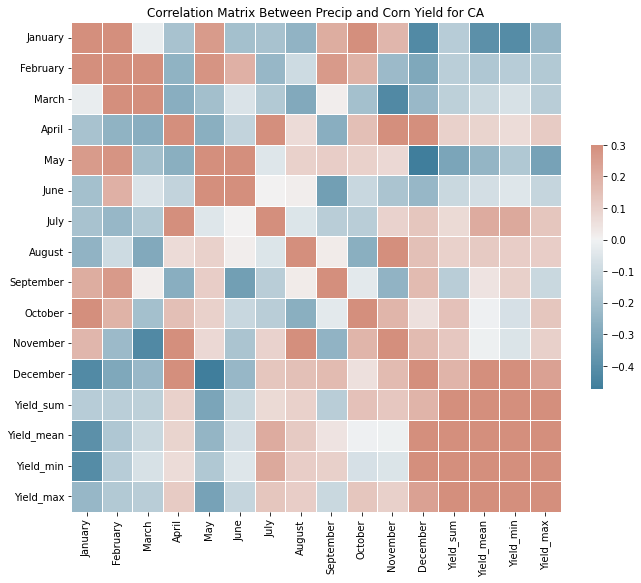

In [214]:
corr_matrix("Precip", "Corn", "CA")